<a href="https://colab.research.google.com/github/khatamirock/colabs_AI_LAB/blob/main/lineear%20rigression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/khatamirock/mlbookcamp-code/
# %cd '/content/mlbookcamp-code/chapter-02-car-price'

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/mlbookcamp-code/chapter-02-car-price/data.csv')
print(df.shape,df.shape[1],df.shape[0])

(11914, 16) 16 11914


In [ ]:
df.head()


In [ ]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.columns


1    8353
0    3561
Name: number_of_doors, dtype: int64

In [ ]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

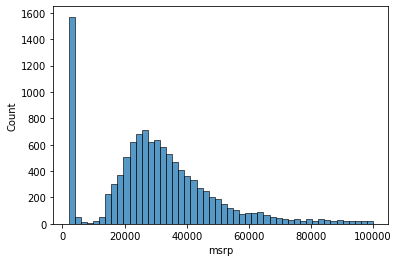

In [ ]:
plt.figure(figsize=(6,4))

sns.histplot(df.msrp[df.msrp < 100000],bins=50)

plt.xlabel='price'
plt.ylabel='COUNT'
plt.title='ERROR'
plt.show()

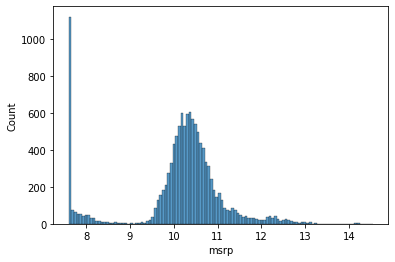

In [ ]:
log_price=np.log1p(df.msrp)
sns.histplot(log_price)

In [ ]:
df.isnull().sum()
n=len(df)
n_val = int(0.2 * n) 
n_test = int(0.2 * n) 
n_train = n - (n_val + n_test)
np.random.seed(2)
idx = np.arange(n)
idx
df_shuffled=df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy() 
df_test = df_shuffled.iloc[n_train+n_val:].copy()
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,Mazda,Navajo,1994,regular unleaded,160.0,6.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,18,14,586,2000
7146,Mazda,Navajo,1994,regular unleaded,160.0,6.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,18,14,586,2000
7147,Lincoln,Navigator,2015,regular unleaded,365.0,6.0,AUTOMATIC,four wheel drive,4.0,Luxury,Large,4dr SUV,20,15,61,65055
7148,Lincoln,Navigator,2015,regular unleaded,365.0,6.0,AUTOMATIC,four wheel drive,4.0,Luxury,Large,4dr SUV,19,15,61,67220


In [ ]:

y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [ ]:
aa=np.arange(6)
np.random.shuffle(aa)
aa

array([4, 1, 3, 2, 5, 0])

In [ ]:
arr=[[1,2,3,4,5],[4,5,6,7,9]]

one=np.ones(2)
npar=np.array(arr)
npar
np.column_stack([one,npar])

array([[1., 1., 2., 3., 4., 5.],
       [1., 4., 5., 6., 7., 9.]])

In [ ]:
# this returns the weight for the selected FEATURES!!! and we can then later use this!!
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num=df_train[base]
df_num = df_num.fillna(0) #supper important to do it .. otherwise wont Work!!
X_train=df_num.values
# df_num.head()

In [ ]:
w_0, w = train_linear_regression(X_train, y_train)
print(w_0,w)

8.005165812128464 [ 9.36057823e-03 -1.54663530e-01  1.52038564e-02  1.26386595e-02
 -1.30422980e-05]


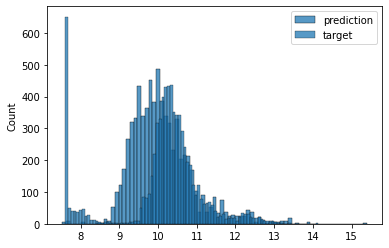

In [ ]:
y_pred=w_0+X_train.dot(w)
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

In [ ]:
val=(df['number_of_doors']==4).astype(int)
print(val.value_counts())
# now count the makers of the cars
# print(df['make'].value_counts())
df.head()


In [ ]:
for v in [2, 3, 4]: 
 feature = 'num_doors_%s' % v 
 value = (df['number_of_doors'] == v).astype(int) 
 df[feature] = value 
 features.append(feature)

NameError: ignored